In [4]:
import pandas as pd
x=pd.read_csv("train.csv")
x

,Comment,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


([<matplotlib.patches.Wedge at 0x186a256dac0>,
 [Text(0.5446292735316758, 0.9557086137585865, 'joy'),
  Text(-1.0921193310892852, 0.13143578911807968, 'sadness'),
  Text(-0.37768765992083225, -1.0331273065520656, 'anger'),
  Text(0.4821866203826105, -0.9886840056984822, 'fear'),
  Text(0.9753570501277893, -0.5086045858680566, 'love'),
  Text(1.0930695989612655, -0.12328362351366204, 'surprise')],
 [Text(0.2970705128354595, 0.5212956075046835, '33.512500%'),
  Text(-0.5957014533214282, 0.07169224860986163, '29.162499%'),
  Text(-0.20601145086590847, -0.5635239853920357, '13.493749%'),
  Text(0.2630108838450602, -0.5392821849264448, '12.106250%'),
  Text(0.5320129364333396, -0.2774206832007581, '8.150000%'),
  Text(0.5962197812515994, -0.06724561282563384, '3.575000%')])

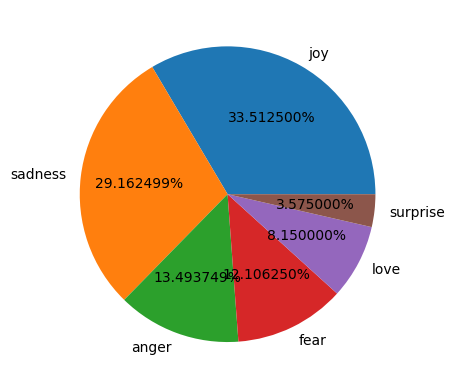

In [5]:
import matplotlib.pyplot as mp
mp.pie(x['Emotion'].value_counts().values,
       labels=x['Emotion'].value_counts().index,
       autopct="%3f%%")

In [4]:
import pandas as pd

x = pd.read_csv("Emotion_classify_data.csv")
x.to_parquet("Emotion_classify_data.parquet")

In [5]:
x=pd.read_csv("Emotion_classify_Data.csv")
x

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear
...,...,...
5932,i begun to feel distressed for you,fear
5933,i left feeling annoyed and angry thinking that...,anger
5934,i were to ever get married i d have everything...,joy
5935,i feel reluctant in applying there because i w...,fear


In [9]:
import spacy
from nltk.corpus import stopwords

nlp = spacy.load('en_core_web_sm')
stop_words = set(stopwords.words('english'))
ctr=0
def words_lemm_fast(text):
    doc = nlp(text)
    tokens = [token.text.lower() for token in doc]
    filtered_tokens = [token for token in tokens if token not in stop_words]
    lemmatized_tokens = [token.lemma_ for token in doc if token.text.lower() in filtered_tokens]
    lemmatized_text = ' '.join(lemmatized_tokens)
    global ctr
    print(ctr)
    ctr+=1
    return lemmatized_text

import pandas as pd
x=pd.read_csv("train.csv")
x['Comment']=x['Comment'].apply(lambda y: words_lemm_fast(y))
x.to_csv('cleaned_train.csv')
print ("DONE")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

# SVC

Accuracy: 0.8275
Classification Report:
              precision    recall  f1-score   support

       anger       0.89      0.76      0.82       427
        fear       0.85      0.72      0.78       397
         joy       0.77      0.95      0.85      1021
        love       0.84      0.47      0.61       296
     sadness       0.87      0.92      0.89       946
    surprise       0.83      0.49      0.61       113

    accuracy                           0.83      3200
   macro avg       0.84      0.72      0.76      3200
weighted avg       0.83      0.83      0.82      3200

Confusion Matrix:
[[326  12  44   1  44   0]
 [ 14 286  55   4  31   7]
 [  6   4 969  17  23   2]
 [  6   1 128 140  21   0]
 [ 15  12  41   4 872   2]
 [  0  23  19   0  16  55]]


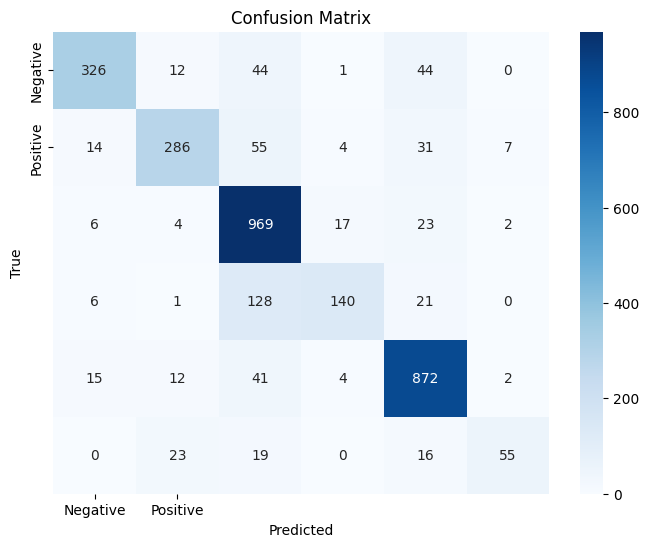

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
import joblib
# Load your dataset
df = pd.read_csv('cleaned_train.csv')

# Split the dataset into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    df['Comment'], df['Emotion'], test_size=0.2, random_state=42
)


# Create a pipeline with TF-IDF vectorization and SVC
model = make_pipeline(TfidfVectorizer(), SVC())

# Train the model
model.fit(train_data, train_labels)

# Make predictions on the test set
predictions = model.predict(test_data)

# Evaluate the model
accuracy = accuracy_score(test_labels, predictions)
classification_report_output = classification_report(test_labels, predictions)
confusion_mat = confusion_matrix(test_labels, predictions)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_output)
print("Confusion Matrix:")
print(confusion_mat)

# for heatmap 
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Random Forest

Accuracy: 0.810625
Classification Report:
              precision    recall  f1-score   support

       anger       0.80      0.74      0.77       427
        fear       0.80      0.79      0.79       397
         joy       0.77      0.89      0.82      1021
        love       0.80      0.62      0.70       296
     sadness       0.88      0.85      0.87       946
    surprise       0.77      0.64      0.70       113

    accuracy                           0.81      3200
   macro avg       0.80      0.75      0.77      3200
weighted avg       0.81      0.81      0.81      3200

Confusion Matrix:
[[316  22  57   3  28   1]
 [ 18 312  38   2  13  14]
 [ 15  10 908  33  52   3]
 [  7   5  95 183   6   0]
 [ 38  25  69   8 803   3]
 [  1  15  17   0   8  72]]


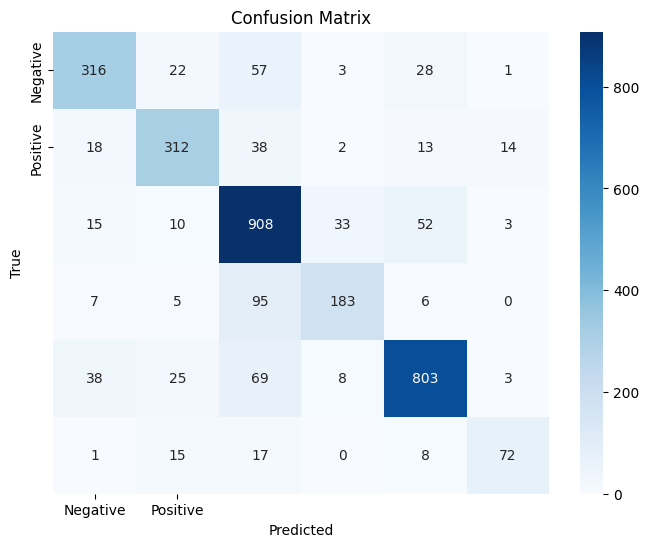

In [17]:
# Importing necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Assuming you have a dataset where each row contains a text and its corresponding emotion label
# Load your dataset into a DataFrame, let's call it 'data'
# The DataFrame should have two columns: 'text' and 'emotion'

# Assuming 'data.csv' is the name of your dataset file
data = pd.read_csv('cleaned_train.csv')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Comment'], data['Emotion'], test_size=0.2, random_state=42)

# Transform text data into numerical features using TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features based on your dataset size
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators based on your dataset size
rf_classifier.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_vectorized)



# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_output)
print("Confusion Matrix:")
print(confusion_mat)

# for heatmap 
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Naive Byes

Accuracy: 0.6634375
Classification Report:
              precision    recall  f1-score   support

       anger       0.94      0.33      0.49       427
        fear       0.91      0.25      0.40       397
         joy       0.59      0.98      0.74      1021
        love       1.00      0.05      0.09       296
     sadness       0.70      0.91      0.79       946
    surprise       1.00      0.01      0.02       113

    accuracy                           0.66      3200
   macro avg       0.86      0.42      0.42      3200
weighted avg       0.76      0.66      0.59      3200

Confusion Matrix:
[[ 141    4  147    0  135    0]
 [   8  101  158    0  130    0]
 [   0    0 1002    0   19    0]
 [   1    1  237   14   43    0]
 [   0    2   80    0  864    0]
 [   0    3   63    0   46    1]]


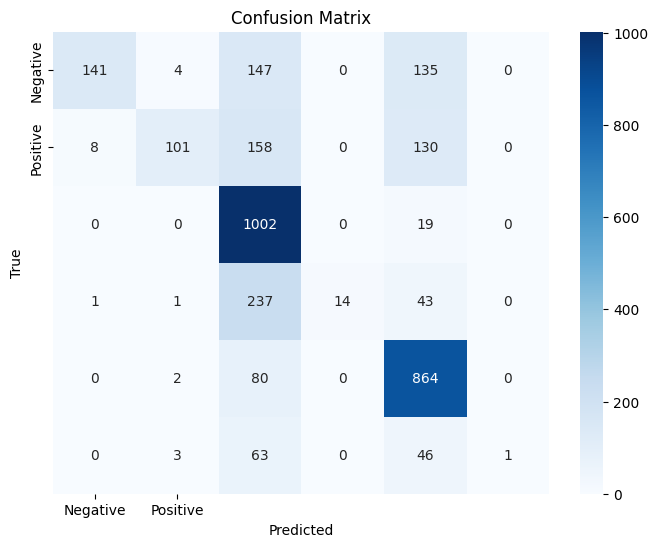

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load your dataset
df = pd.read_csv('cleaned_train.csv')  # Assuming your dataset is in a CSV file

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Comment'], df['Emotion'], test_size=0.2, random_state=42)

# Transform text data into numerical features using TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=10000)  # You can adjust max_features based on your dataset
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Initialize and train the Naive Bayes Classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = naive_bayes_classifier.predict(X_test_vectorized)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_output)
print("Confusion Matrix:")
print(confusion_mat)

# for heatmap 
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Logistic Regression

Accuracy: 0.8371875
Classification Report:
              precision    recall  f1-score   support

       anger       0.90      0.79      0.84       427
        fear       0.85      0.72      0.78       397
         joy       0.79      0.96      0.86      1021
        love       0.85      0.52      0.65       296
     sadness       0.87      0.93      0.90       946
    surprise       0.81      0.44      0.57       113

    accuracy                           0.84      3200
   macro avg       0.84      0.73      0.77      3200
weighted avg       0.84      0.84      0.83      3200

Confusion Matrix:
[[336  13  33   2  43   0]
 [ 16 285  53   3  30  10]
 [  4   2 977  18  20   0]
 [  6   4 111 155  20   0]
 [ 13   8  43   4 876   2]
 [  0  22  22   0  19  50]]


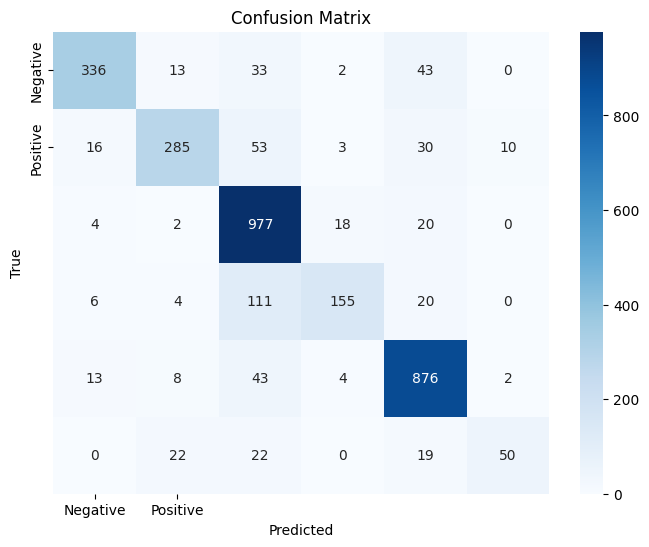

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load your dataset
df = pd.read_csv('cleaned_train.csv')  # Assuming your dataset is in a CSV file

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Comment'], df['Emotion'], test_size=0.2, random_state=42)

# Transform text data into numerical features using TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=10000)  # You can adjust max_features based on your dataset
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Initialize and train the Logistic Regression model
logreg_classifier = LogisticRegression(max_iter=1000)  # You can adjust max_iter based on convergence
logreg_classifier.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = logreg_classifier.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_output)
print("Confusion Matrix:")
print(confusion_mat)

# for heatmap 
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Ensemble LR & SVC

Accuracy (Ensemble Model): 0.8646875
Classification Report (Ensemble Model):
              precision    recall  f1-score   support

       anger       0.87      0.86      0.86       427
        fear       0.84      0.82      0.83       397
         joy       0.86      0.92      0.89      1021
        love       0.79      0.63      0.70       296
     sadness       0.91      0.92      0.91       946
    surprise       0.78      0.67      0.72       113

    accuracy                           0.86      3200
   macro avg       0.84      0.80      0.82      3200
weighted avg       0.86      0.86      0.86      3200

Confusion Matrix (Ensemble Model):
[[368  16  13   5  23   2]
 [ 16 324  18   3  22  14]
 [ 10   6 944  34  24   3]
 [  8   6  84 187  11   0]
 [ 23  17  28   7 868   3]
 [  0  18  10   0   9  76]]


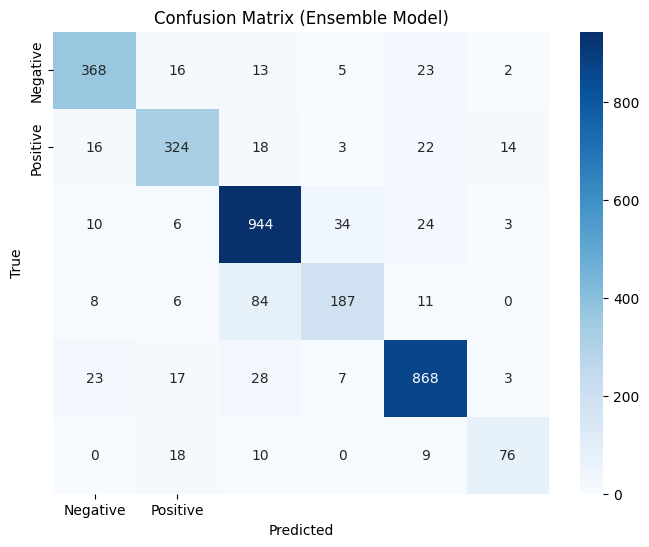

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('cleaned_train.csv')  # Assuming your dataset is in a CSV file

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Comment'], df['Emotion'], test_size=0.2, random_state=42)

# Transform text data into numerical features using TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=10000)  # You can adjust max_features based on your dataset
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Initialize the individual classifiers
logreg_classifier = LogisticRegression(max_iter=1000)
svc_classifier = SVC(probability=True)  # Set probability=True for soft voting

# Create the ensemble model with the two classifiers
ensemble_model = VotingClassifier(estimators=[
    ('lr', logreg_classifier),
    ('svc', svc_classifier)
], voting='soft')  # Use 'soft' voting for averaged probability predictions

# Train the ensemble model on the training data
ensemble_model.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred_ensemble = ensemble_model.predict(X_test_vectorized)

# Evaluate the ensemble model
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
classification_report_output_ensemble = classification_report(y_test, y_pred_ensemble)
confusion_mat_ensemble = confusion_matrix(y_test, y_pred_ensemble)

print(f"Accuracy (Ensemble Model): {accuracy_ensemble}")
print("Classification Report (Ensemble Model):")
print(classification_report_output_ensemble)
print("Confusion Matrix (Ensemble Model):")
print(confusion_mat_ensemble)

# Plot confusion matrix for the ensemble model
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_ensemble, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix (Ensemble Model)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Ensemble LR & RF

Accuracy (Ensemble Model): 0.84125
Classification Report (Ensemble Model):
              precision    recall  f1-score   support

       anger       0.84      0.89      0.86       427
        fear       0.82      0.84      0.83       397
         joy       0.79      0.95      0.86      1021
        love       0.87      0.52      0.65       296
     sadness       0.92      0.85      0.89       946
    surprise       0.83      0.42      0.56       113

    accuracy                           0.84      3200
   macro avg       0.85      0.75      0.78      3200
weighted avg       0.85      0.84      0.83      3200

Confusion Matrix (Ensemble Model):
[[379  10  14   2  22   0]
 [ 22 334  19   1  13   8]
 [ 11  10 971  12  17   0]
 [  7   6 129 153   1   0]
 [ 34  19  78   6 807   2]
 [  0  26  23   1  15  48]]


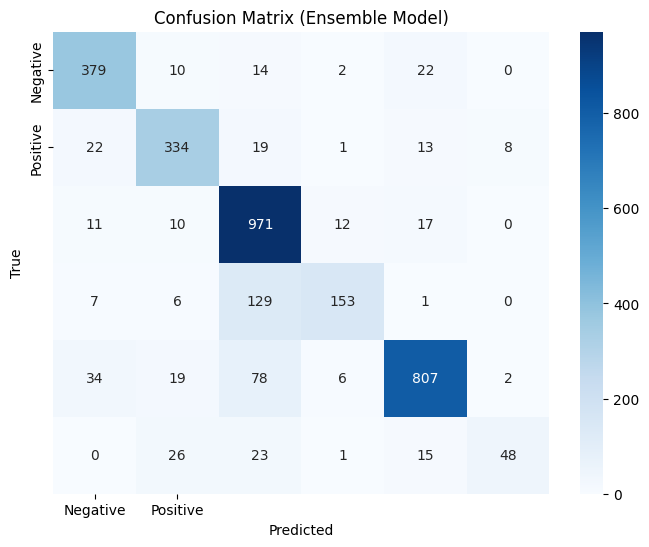

In [21]:
from sklearn.ensemble import VotingClassifier

# Initialize the Logistic Regression model
logreg_classifier = LogisticRegression(max_iter=1000)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Create the ensemble model with both classifiers
ensemble_model = VotingClassifier(estimators=[
    ('logreg', logreg_classifier),
    ('rf', rf_classifier)
], voting='hard')  # Use 'hard' voting for simple majority voting

# Train the ensemble model on the training data
ensemble_model.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred_ensemble = ensemble_model.predict(X_test_vectorized)

# Evaluate the ensemble model
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
classification_report_output_ensemble = classification_report(y_test, y_pred_ensemble)
confusion_mat_ensemble = confusion_matrix(y_test, y_pred_ensemble)

print(f"Accuracy (Ensemble Model): {accuracy_ensemble}")
print("Classification Report (Ensemble Model):")
print(classification_report_output_ensemble)
print("Confusion Matrix (Ensemble Model):")
print(confusion_mat_ensemble)

# Plot confusion matrix for the ensemble model
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_ensemble, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix (Ensemble Model)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Ensemble LR & NB

Accuracy (Ensemble Model): 0.7815625
Classification Report (Ensemble Model):
              precision    recall  f1-score   support

       anger       0.89      0.79      0.84       427
        fear       0.86      0.72      0.78       397
         joy       0.68      0.98      0.81      1021
        love       0.90      0.12      0.22       296
     sadness       0.86      0.88      0.87       946
    surprise       1.00      0.01      0.02       113

    accuracy                           0.78      3200
   macro avg       0.87      0.59      0.59      3200
weighted avg       0.82      0.78      0.74      3200

Confusion Matrix (Ensemble Model):
[[ 337   12   38    0   40    0]
 [  17  286   59    0   35    0]
 [   4    2 1004    0   11    0]
 [   6    4  233   37   16    0]
 [  13    8   85    4  836    0]
 [   0   22   54    0   36    1]]


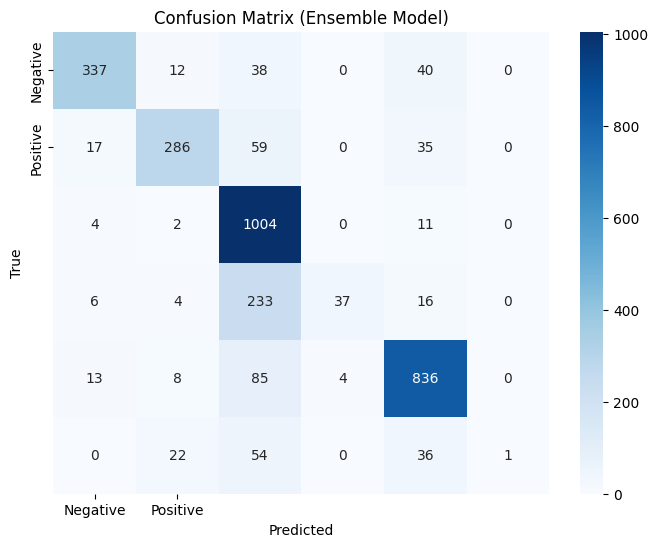

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('cleaned_train.csv')  # Assuming your dataset is in a CSV file

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Comment'], df['Emotion'], test_size=0.2, random_state=42)

# Transform text data into numerical features using TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=10000)  # You can adjust max_features based on your dataset
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Initialize the Naive Bayes Classifier
naive_bayes_classifier = MultinomialNB()

# Initialize the Logistic Regression model
logreg_classifier = LogisticRegression(max_iter=1000)  # You can adjust max_iter based on convergence

# Create the ensemble model with both classifiers
ensemble_model = VotingClassifier(estimators=[
    ('nb', naive_bayes_classifier),
    ('logreg', logreg_classifier)
], voting='hard')  # Use 'hard' voting for simple majority voting

# Train the ensemble model on the training data
ensemble_model.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred_ensemble = ensemble_model.predict(X_test_vectorized)

# Evaluate the ensemble model
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
classification_report_output_ensemble = classification_report(y_test, y_pred_ensemble)
confusion_mat_ensemble = confusion_matrix(y_test, y_pred_ensemble)

print(f"Accuracy (Ensemble Model): {accuracy_ensemble}")
print("Classification Report (Ensemble Model):")
print(classification_report_output_ensemble)
print("Confusion Matrix (Ensemble Model):")
print(confusion_mat_ensemble)

# Plot confusion matrix for the ensemble model
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_ensemble, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix (Ensemble Model)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Ensemble NB & RF

Accuracy (Ensemble Model): 0.7859375
Classification Report (Ensemble Model):
              precision    recall  f1-score   support

       anger       0.85      0.85      0.85       427
        fear       0.83      0.83      0.83       397
         joy       0.68      0.97      0.80      1021
        love       0.92      0.16      0.28       296
     sadness       0.89      0.83      0.86       946
    surprise       1.00      0.01      0.02       113

    accuracy                           0.79      3200
   macro avg       0.86      0.61      0.61      3200
weighted avg       0.82      0.79      0.75      3200

Confusion Matrix (Ensemble Model):
[[364  12  23   0  28   0]
 [ 17 330  28   0  22   0]
 [ 11  10 989   0  11   0]
 [  5   5 237  48   1   0]
 [ 31  17 111   4 783   0]
 [  0  22  58   0  32   1]]


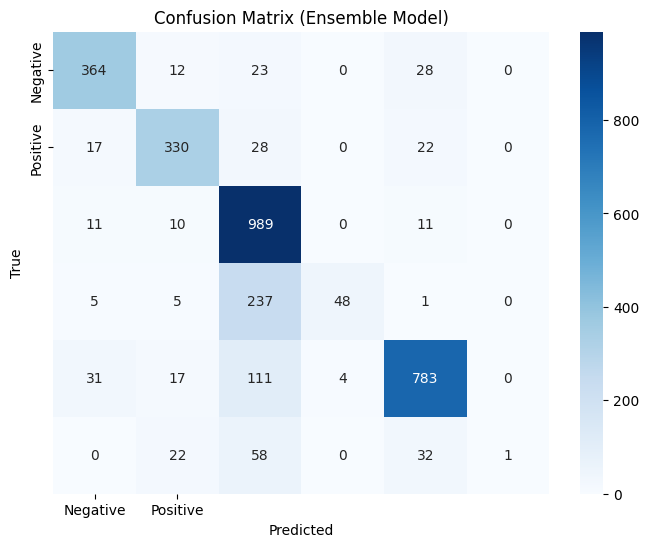

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('cleaned_train.csv')  # Assuming your dataset is in a CSV file

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Comment'], df['Emotion'], test_size=0.2, random_state=42)

# Transform text data into numerical features using TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=10000)  # You can adjust max_features based on your dataset
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Initialize the Naive Bayes Classifier
naive_bayes_classifier = MultinomialNB()

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators based on your dataset size

# Create the ensemble model with both classifiers
ensemble_model = VotingClassifier(estimators=[
    ('nb', naive_bayes_classifier),
    ('rf', rf_classifier)
], voting='hard')  # Use 'hard' voting for simple majority voting

# Train the ensemble model on the training data
ensemble_model.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred_ensemble = ensemble_model.predict(X_test_vectorized)

# Evaluate the ensemble model
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
classification_report_output_ensemble = classification_report(y_test, y_pred_ensemble)
confusion_mat_ensemble = confusion_matrix(y_test, y_pred_ensemble)

print(f"Accuracy (Ensemble Model): {accuracy_ensemble}")
print("Classification Report (Ensemble Model):")
print(classification_report_output_ensemble)
print("Confusion Matrix (Ensemble Model):")
print(confusion_mat_ensemble)

# Plot confusion matrix for the ensemble model
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_ensemble, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix (Ensemble Model)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Ensemble NB & SVC

Accuracy (Ensemble Model): 0.8540625
Classification Report (Ensemble Model):
              precision    recall  f1-score   support

       anger       0.87      0.82      0.85       427
        fear       0.84      0.79      0.81       397
         joy       0.83      0.94      0.88      1021
        love       0.83      0.57      0.67       296
     sadness       0.89      0.92      0.90       946
    surprise       0.77      0.64      0.70       113

    accuracy                           0.85      3200
   macro avg       0.84      0.78      0.80      3200
weighted avg       0.85      0.85      0.85      3200

Confusion Matrix (Ensemble Model):
[[351  16  21   4  34   1]
 [ 15 312  25   3  28  14]
 [  9   6 958  21  24   3]
 [  8   4 103 168  13   0]
 [ 19  15  31   6 872   3]
 [  0  20  10   0  11  72]]


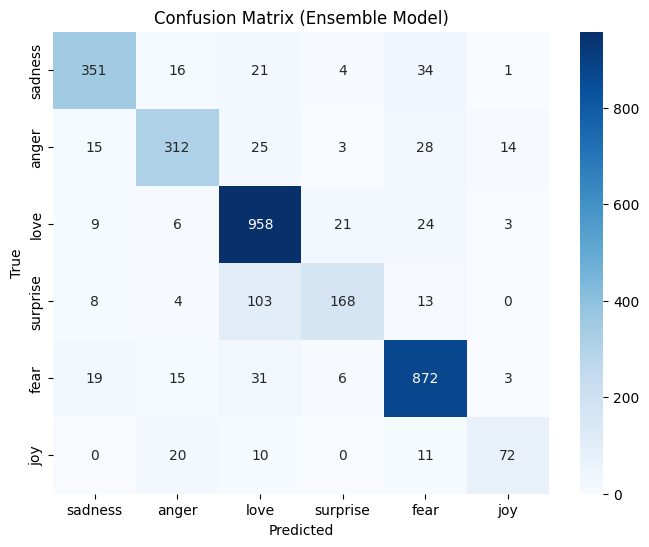

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('cleaned_train.csv')  # Assuming your dataset is in a CSV file

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Comment'], df['Emotion'], test_size=0.2, random_state=42)

# Create pipelines for individual classifiers
pipeline_svc = make_pipeline(TfidfVectorizer(max_features=10000), SVC(probability=True))  # Set probability=True for soft voting
pipeline_nb = make_pipeline(TfidfVectorizer(max_features=10000), MultinomialNB())

# Initialize the ensemble model with VotingClassifier
ensemble_model = VotingClassifier(estimators=[
    ('svc', pipeline_svc),
    ('nb', pipeline_nb)
], voting='soft')  # Use 'soft' voting for averaged probability predictions

# Train the ensemble model on the training data
ensemble_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ensemble_model.predict(X_test)

# Evaluate the ensemble model
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print(f"Accuracy (Ensemble Model): {accuracy}")
print("Classification Report (Ensemble Model):")
print(classification_report_output)
print("Confusion Matrix (Ensemble Model):")
print(confusion_mat)

# Plot confusion matrix for the ensemble model
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=df['Emotion'].unique(), yticklabels=df['Emotion'].unique())
plt.title('Confusion Matrix (Ensemble Model)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Ensemble RF & SVC

Accuracy (Ensemble Model): 0.85875
Classification Report (Ensemble Model):
              precision    recall  f1-score   support

       anger       0.84      0.85      0.85       427
        fear       0.83      0.84      0.84       397
         joy       0.85      0.91      0.88      1021
        love       0.79      0.68      0.73       296
     sadness       0.91      0.90      0.91       946
    surprise       0.76      0.65      0.70       113

    accuracy                           0.86      3200
   macro avg       0.83      0.80      0.82      3200
weighted avg       0.86      0.86      0.86      3200

Confusion Matrix (Ensemble Model):
[[365  16  22   4  19   1]
 [ 16 332  17   3  14  15]
 [ 12   9 925  36  35   4]
 [  7   5  80 200   4   0]
 [ 32  17  30  11 852   4]
 [  0  19  12   0   8  74]]


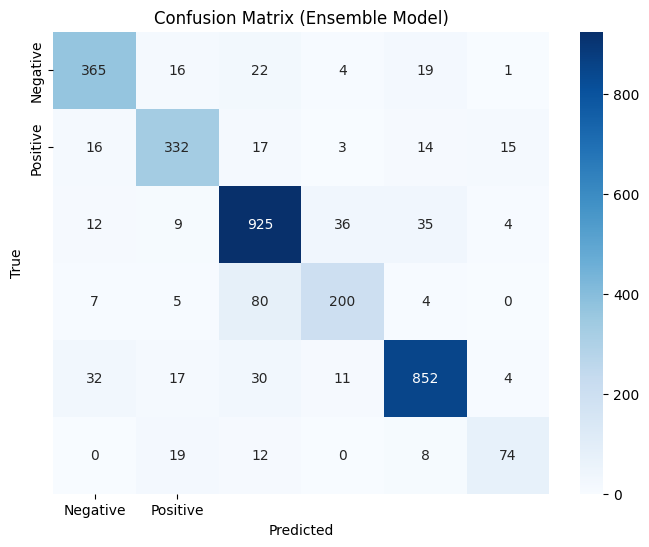

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('cleaned_train.csv')

# Split the dataset into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    df['Comment'], df['Emotion'], test_size=0.2, random_state=42
)

# Create pipelines for individual classifiers
pipeline_svc = make_pipeline(TfidfVectorizer(), SVC(probability=True))  # Set probability=True for soft voting
pipeline_rf = make_pipeline(TfidfVectorizer(max_features=1000), RandomForestClassifier(n_estimators=100, random_state=42))

# Initialize the ensemble model with VotingClassifier
ensemble_model = VotingClassifier(estimators=[
    ('svc', pipeline_svc),
    ('rf', pipeline_rf)
], voting='soft')  # Use 'soft' voting for averaged probability predictions

# Train the ensemble model on the training data
ensemble_model.fit(train_data, train_labels)

# Make predictions on the test set
predictions = ensemble_model.predict(test_data)

# Evaluate the ensemble model
accuracy = accuracy_score(test_labels, predictions)
classification_report_output = classification_report(test_labels, predictions)
confusion_mat = confusion_matrix(test_labels, predictions)

print(f"Accuracy (Ensemble Model): {accuracy}")
print("Classification Report (Ensemble Model):")
print(classification_report_output)
print("Confusion Matrix (Ensemble Model):")
print(confusion_mat)

# Plot confusion matrix for the ensemble model
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix (Ensemble Model)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Ensemble LR, RF & NB

Accuracy (Ensemble Model): 0.83375
Classification Report (Ensemble Model):
              precision    recall  f1-score   support

       anger       0.90      0.77      0.83       427
        fear       0.86      0.73      0.79       397
         joy       0.77      0.96      0.86      1021
        love       0.90      0.47      0.62       296
     sadness       0.87      0.93      0.90       946
    surprise       0.83      0.42      0.56       113

    accuracy                           0.83      3200
   macro avg       0.85      0.71      0.76      3200
weighted avg       0.84      0.83      0.82      3200

Confusion Matrix (Ensemble Model):
[[330  10  38   2  47   0]
 [ 16 288  53   0  32   8]
 [  4   2 984  12  19   0]
 [  6   4 131 139  16   0]
 [ 11   7  45   2 879   2]
 [  0  23  24   0  18  48]]


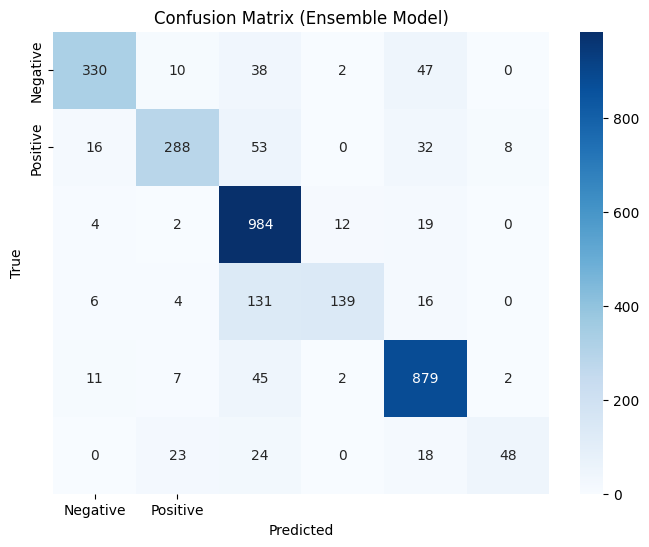

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('cleaned_train.csv')  # Assuming your dataset is in a CSV file

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Comment'], df['Emotion'], test_size=0.2, random_state=42)

# Transform text data into numerical features using TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=10000)  # You can adjust max_features based on your dataset
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Initialize the individual classifiers
naive_bayes_classifier = MultinomialNB()
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
logreg_classifier = LogisticRegression(max_iter=1000)

# Create the ensemble model with the three classifiers
ensemble_model = VotingClassifier(estimators=[
    ('nb', naive_bayes_classifier),
    ('rf', rf_classifier),
    ('lr', logreg_classifier)
], voting='hard')  # Use 'hard' voting for simple majority voting

# Train the ensemble model on the training data
ensemble_model.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred_ensemble = ensemble_model.predict(X_test_vectorized)

# Evaluate the ensemble model
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
classification_report_output_ensemble = classification_report(y_test, y_pred_ensemble)
confusion_mat_ensemble = confusion_matrix(y_test, y_pred_ensemble)

print(f"Accuracy (Ensemble Model): {accuracy_ensemble}")
print("Classification Report (Ensemble Model):")
print(classification_report_output_ensemble)
print("Confusion Matrix (Ensemble Model):")
print(confusion_mat_ensemble)

# Plot confusion matrix for the ensemble model
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_ensemble, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix (Ensemble Model)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Ensemble LR, RF & SVC

Accuracy (Ensemble Model): 0.8653125
Classification Report (Ensemble Model):
              precision    recall  f1-score   support

       anger       0.86      0.87      0.87       427
        fear       0.84      0.82      0.83       397
         joy       0.85      0.93      0.89      1021
        love       0.81      0.65      0.72       296
     sadness       0.91      0.91      0.91       946
    surprise       0.78      0.66      0.72       113

    accuracy                           0.87      3200
   macro avg       0.84      0.81      0.82      3200
weighted avg       0.86      0.87      0.86      3200

Confusion Matrix (Ensemble Model):
[[371  14  16   4  21   1]
 [ 15 324  21   3  20  14]
 [ 10   7 945  32  24   3]
 [  7   5  86 191   7   0]
 [ 27  18  28   7 863   3]
 [  0  19  10   0   9  75]]


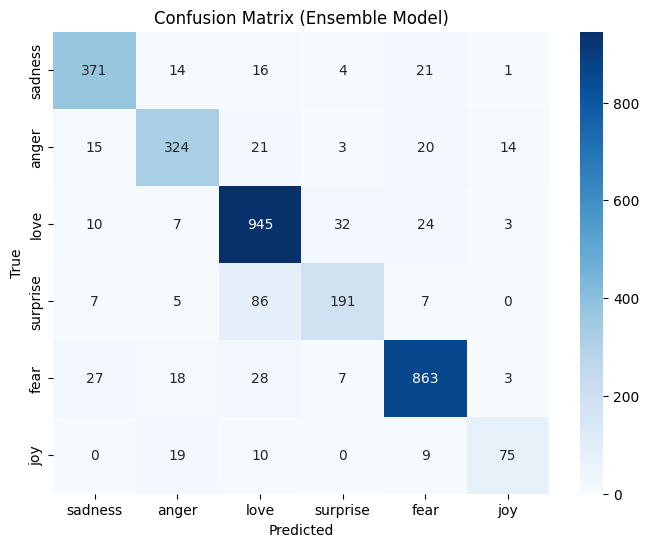

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('cleaned_train.csv')  # Assuming your dataset is in a CSV file

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Comment'], df['Emotion'], test_size=0.2, random_state=42)

# Create pipelines for individual classifiers
pipeline_svc = make_pipeline(TfidfVectorizer(max_features=10000), SVC(probability=True))  # Set probability=True for soft voting
pipeline_rf = make_pipeline(TfidfVectorizer(max_features=10000), RandomForestClassifier(n_estimators=100, random_state=42))
pipeline_lr = make_pipeline(TfidfVectorizer(max_features=10000), LogisticRegression(max_iter=1000))

# Initialize the ensemble model with VotingClassifier
ensemble_model = VotingClassifier(estimators=[
    ('svc', pipeline_svc),
    ('rf', pipeline_rf),
    ('lr', pipeline_lr)
], voting='soft')  # Use 'soft' voting for averaged probability predictions

# Train the ensemble model on the training data
ensemble_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ensemble_model.predict(X_test)

# Evaluate the ensemble model
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print(f"Accuracy (Ensemble Model): {accuracy}")
print("Classification Report (Ensemble Model):")
print(classification_report_output)
print("Confusion Matrix (Ensemble Model):")
print(confusion_mat)

# Plot confusion matrix for the ensemble model
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=df['Emotion'].unique(), yticklabels=df['Emotion'].unique())
plt.title('Confusion Matrix (Ensemble Model)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Ensemble LR, SVC & NB

Accuracy (Ensemble Model): 0.8534375
Classification Report (Ensemble Model):
              precision    recall  f1-score   support

       anger       0.88      0.81      0.85       427
        fear       0.85      0.78      0.81       397
         joy       0.83      0.94      0.88      1021
        love       0.84      0.56      0.68       296
     sadness       0.89      0.92      0.91       946
    surprise       0.78      0.61      0.69       113

    accuracy                           0.85      3200
   macro avg       0.84      0.77      0.80      3200
weighted avg       0.85      0.85      0.85      3200

Confusion Matrix (Ensemble Model):
[[348  15  23   4  37   0]
 [ 15 308  32   3  26  13]
 [  8   4 964  19  23   3]
 [  8   4 104 167  13   0]
 [ 16  13  34   5 875   3]
 [  0  20  11   0  13  69]]


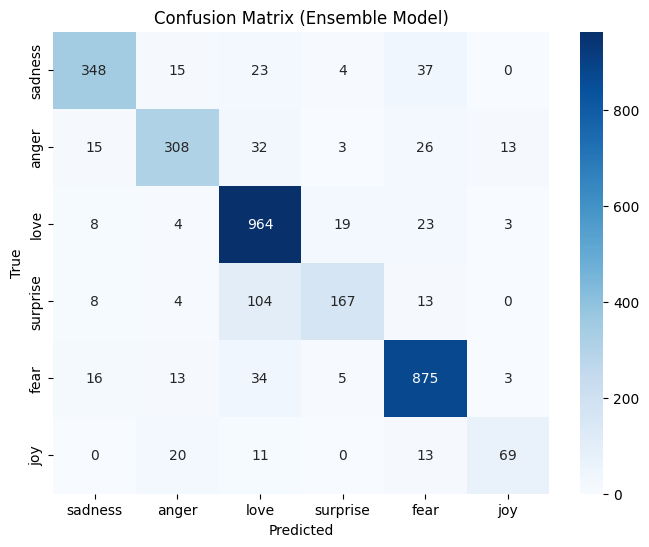

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('cleaned_train.csv')  # Assuming your dataset is in a CSV file

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Comment'], df['Emotion'], test_size=0.2, random_state=42)

# Create pipelines for individual classifiers
pipeline_svc = make_pipeline(TfidfVectorizer(max_features=10000), SVC(probability=True))  # Set probability=True for soft voting
pipeline_nb = make_pipeline(TfidfVectorizer(max_features=10000), MultinomialNB())
pipeline_lr = make_pipeline(TfidfVectorizer(max_features=10000), LogisticRegression(max_iter=1000))

# Initialize the ensemble model with VotingClassifier
ensemble_model = VotingClassifier(estimators=[
    ('svc', pipeline_svc),
    ('nb', pipeline_nb),
    ('lr', pipeline_lr)
], voting='soft')  # Use 'soft' voting for averaged probability predictions

# Train the ensemble model on the training data
ensemble_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ensemble_model.predict(X_test)

# Evaluate the ensemble model
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print(f"Accuracy (Ensemble Model): {accuracy}")
print("Classification Report (Ensemble Model):")
print(classification_report_output)
print("Confusion Matrix (Ensemble Model):")
print(confusion_mat)

# Plot confusion matrix for the ensemble model
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=df['Emotion'].unique(), yticklabels=df['Emotion'].unique())
plt.title('Confusion Matrix (Ensemble Model)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Ensemble SVC, RF & NB

Accuracy (Ensemble Model): 0.8590625
Classification Report (Ensemble Model):
              precision    recall  f1-score   support

       anger       0.87      0.83      0.85       427
        fear       0.84      0.79      0.82       397
         joy       0.83      0.93      0.88      1021
        love       0.84      0.61      0.71       296
     sadness       0.91      0.92      0.92       946
    surprise       0.80      0.63      0.70       113

    accuracy                           0.86      3200
   macro avg       0.85      0.79      0.81      3200
weighted avg       0.86      0.86      0.86      3200

Confusion Matrix (Ensemble Model):
[[356  14  29   2  25   1]
 [ 15 315  32   2  21  12]
 [  9   8 952  24  26   2]
 [  7   5 100 180   4   0]
 [ 22  14  26   6 875   3]
 [  0  19  12   0  11  71]]


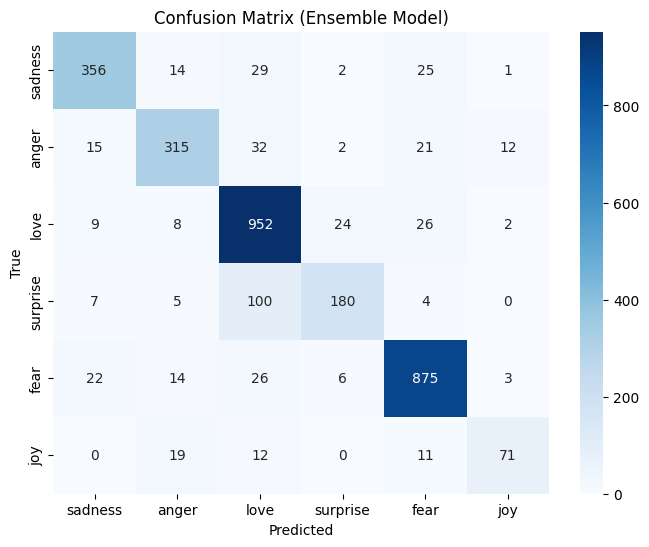

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('cleaned_train.csv')  # Assuming your dataset is in a CSV file

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Comment'], df['Emotion'], test_size=0.2, random_state=42)
vectorizer=TfidfVectorizer()
vectorizer.fit_transform(X_train)
vectorizer.transform(X_test)

# Create pipelines for individual classifiers
pipeline_svc = make_pipeline(TfidfVectorizer(max_features=10000), SVC(probability=True))  # Set probability=True for soft voting
pipeline_rf = make_pipeline(TfidfVectorizer(max_features=1000), RandomForestClassifier(n_estimators=100, random_state=42))
pipeline_nb = make_pipeline(TfidfVectorizer(max_features=10000), MultinomialNB())

# Initialize the ensemble model with VotingClassifier
ensemble_model = VotingClassifier(estimators=[
    ('svc', pipeline_svc),
    ('rf', pipeline_rf),
    ('nb', pipeline_nb)
], voting='soft')  # Use 'soft' voting for averaged probability predictions

# Train the ensemble model on the training data
ensemble_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ensemble_model.predict(X_test)

# Evaluate the ensemble model
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print(f"Accuracy (Ensemble Model): {accuracy}")
print("Classification Report (Ensemble Model):")
print(classification_report_output)
print("Confusion Matrix (Ensemble Model):")
print(confusion_mat)

# Plot confusion matrix for the ensemble model
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=df['Emotion'].unique(), yticklabels=df['Emotion'].unique())
plt.title('Confusion Matrix (Ensemble Model)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [31]:
import joblib
joblib.dump(ensemble_model,'svc_rf_nb(new).pkl')

['svc_rf_nb(new).pkl']

# Ensemble LR, SVC, RF and NB

Accuracy (Ensemble Model): 0.8596875
Classification Report (Ensemble Model):
              precision    recall  f1-score   support

       anger       0.88      0.83      0.85       427
        fear       0.84      0.79      0.81       397
         joy       0.83      0.94      0.88      1021
        love       0.85      0.60      0.70       296
     sadness       0.91      0.93      0.92       946
    surprise       0.79      0.62      0.69       113

    accuracy                           0.86      3200
   macro avg       0.85      0.78      0.81      3200
weighted avg       0.86      0.86      0.86      3200

Confusion Matrix (Ensemble Model):
[[353  14  29   2  28   1]
 [ 14 313  31   3  23  13]
 [  9   7 960  21  22   2]
 [  6   4 103 177   6   0]
 [ 18  14  28   5 878   3]
 [  0  20  11   0  12  70]]


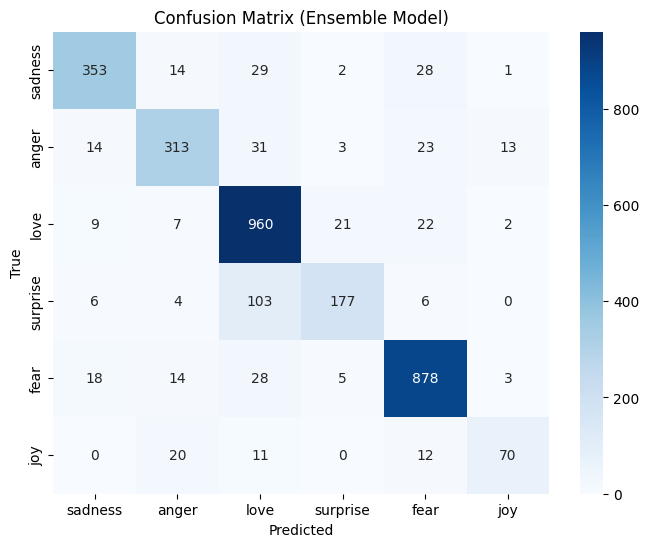

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('cleaned_train.csv')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Comment'], df['Emotion'], test_size=0.2, random_state=42)

# Create pipelines for individual classifiers
pipeline_svc = make_pipeline(TfidfVectorizer(max_features=10000), SVC(probability=True))  # Set probability=True for soft voting
pipeline_rf = make_pipeline(TfidfVectorizer(max_features=1000), RandomForestClassifier(n_estimators=100, random_state=42))
pipeline_nb = make_pipeline(TfidfVectorizer(max_features=10000), MultinomialNB())
pipeline_lr = make_pipeline(TfidfVectorizer(max_features=10000), LogisticRegression(max_iter=1000))

# Initialize the ensemble model with VotingClassifier
ensemble_model = VotingClassifier(estimators=[
    ('svc', pipeline_svc),
    ('rf', pipeline_rf),
    ('nb', pipeline_nb),
    ('lr', pipeline_lr)
], voting='soft')  # Use 'soft' voting for averaged probability predictions

# Train the ensemble model on the training data
ensemble_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ensemble_model.predict(X_test)

# Evaluate the ensemble model
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print(f"Accuracy (Ensemble Model): {accuracy}")
print("Classification Report (Ensemble Model):")
print(classification_report_output)
print("Confusion Matrix (Ensemble Model):")
print(confusion_mat)

# Plot confusion matrix for the ensemble model
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=df['Emotion'].unique(), yticklabels=df['Emotion'].unique())
plt.title('Confusion Matrix (Ensemble Model)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
